# ORB : Oriented FAST and Rotated BRIEF
- FAST : Features from Accelerated Segment Test
- BRIEF : Binary Robust Independent Elementary Features

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## FAST : Intensity based corner detection algorithm

In [2]:
# Load the image
img=cv2.imread('CV-1.jpg')

# Converting image to grayscale
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# Create FAST Detector Object
fast = cv2.FastFeatureDetector_create()

# Obtain keypoints
keypoints = fast.detect(gray, None)
print("Number of keypoints:", len(keypoints))

Number of keypoints: 636


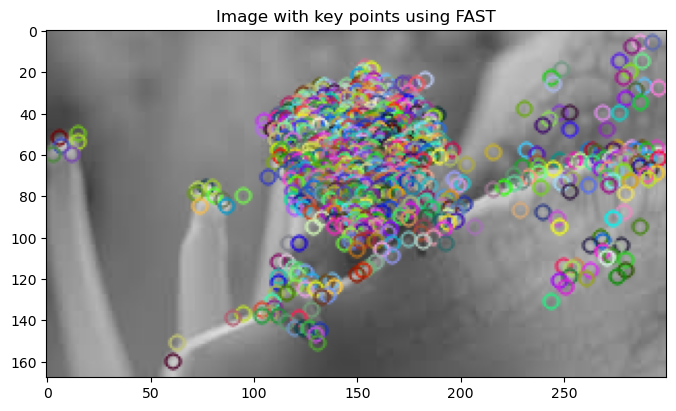

In [4]:
# Marking the key points on the image
img_with_kp=cv2.drawKeypoints(gray,keypoints,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot the image
img_with_kp=cv2.cvtColor(img_with_kp, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(img_with_kp)
plt.title("Image with key points using FAST")
plt.show()

## BRIEF :  Feature Descriptor that generates Binary Descriptor for the keypoints

In [5]:
# Load the image
img=cv2.imread('CV-1.jpg')

# Converting image to grayscale
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
# ! pip uninstall opencv-python
# ! pip install opencv-contrib-python

In [7]:
# Create FAST Detector Object
fast = cv2.FastFeatureDetector_create()

# Brief Descriptor Extraction
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Obtain keypoints
keypoints = fast.detect(gray, None)

keypoints, descriptors = brief.compute(gray,keypoints)
print("Number of keypoints:", len(keypoints))

Number of keypoints: 550


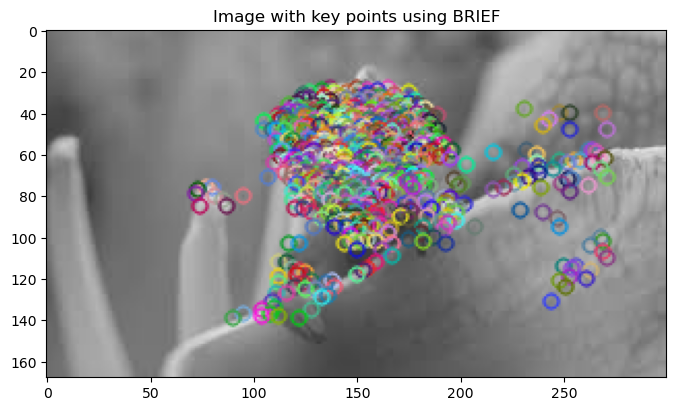

In [8]:
# Marking the key points on the image
img_with_kp=cv2.drawKeypoints(gray,keypoints,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot the image
img_with_kp=cv2.cvtColor(img_with_kp, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(img_with_kp)
plt.title("Image with key points using BRIEF")
plt.show()

## ORB

In [9]:
# Load the image
img=cv2.imread('CV-1.jpg')

# Converting image to grayscale
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
# Create ORB Detector 
orb = cv2.ORB_create()

In [13]:
# Create FAST Detector Object
fast = cv2.FastFeatureDetector_create()

# Brief Descriptor Extraction
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Obtain keypoints
keypoints = fast.detect(gray, None)

#Detect keypoints and descriptor
keypoints, descriptors = orb.compute(gray,keypoints)
print("Number of keypoints:", len(keypoints))

Number of keypoints: 525


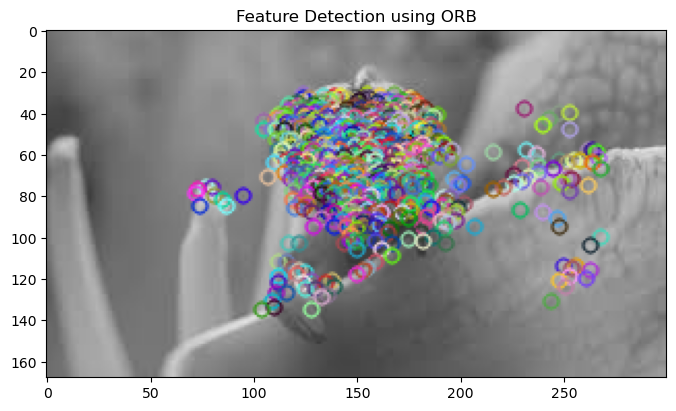

In [14]:
# Marking the key points on the image
img=cv2.drawKeypoints(gray,keypoints,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot the image
img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.title("Feature Detection using ORB")
plt.show()

## 18-2-2025

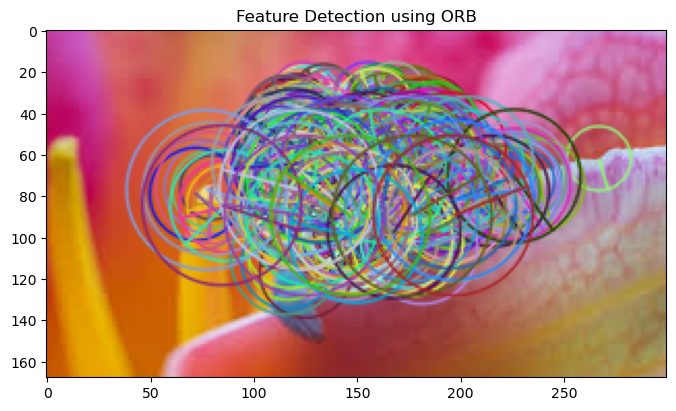

In [22]:
# Load the image
image=cv2.imread('CV-1.jpg')

# Create ORB Detector 
orb = cv2.ORB_create()

#Detect keypoints and descriptor
keypoints, descriptors = orb.detectAndCompute(gray,None)

# Marking the key points on the image
img_kp=cv2.drawKeypoints(image,keypoints,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot the image
img_rgb=cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.title("Feature Detection using ORB")
plt.show()

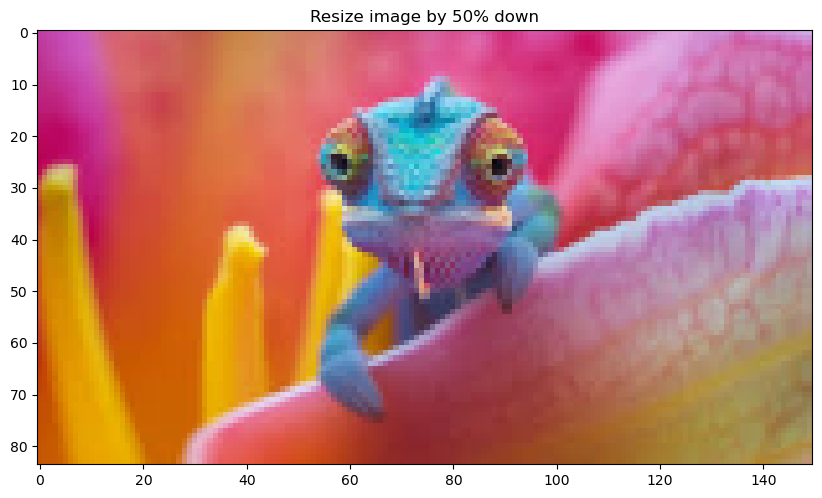

In [60]:
# load image
image = cv2.imread('CV-1.jpg')

# Resize image by 50% down
scaled_img = cv2.resize(image,None , fx = 0.5,fy = 0.5 , interpolation=cv2.INTER_LINEAR)


#plot the Image
img_rgb=cv2.cvtColor(scaled_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.title("Resize image by 50% down")
plt.show()

## Match the keypoints Using ORB in Scaled Image

In [34]:
# load image
image1 = cv2.imread('CV-1.jpg')

# Resize image by 50% down
scaled_img = cv2.resize(image1,None , fx = 0.5,fy = 0.5 , interpolation=cv2.INTER_LINEAR)


In [43]:
# Convertng Iamge to grayscale
gray1 = cv2.cvtColor(image1 , cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(scaled_img , cv2.COLOR_BGR2GRAY)

In [44]:
#Create ORB Detector
orb = cv2.ORB_create()

In [45]:
# Detect Keypoints and Descriptor
keypoints1 , descriptors1 = orb.detectAndCompute(gray1,None)
keypoints2 , descriptors2 = orb.detectAndCompute(gray2,None)

In [46]:
# Create BFMaker 
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

In [47]:
# match Descriptor bw the two image
matches = bf.match(descriptors1,descriptors2)

In [48]:
# sort matches by distance
matches = sorted(matches , key=lambda x :x.distance)

In [49]:
#Drow top a matches
N_MATCH = 100
matched_image = cv2.drawMatches(image1 , keypoints1 ,scaled_img , keypoints2 , matches[:N_MATCH],None,flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

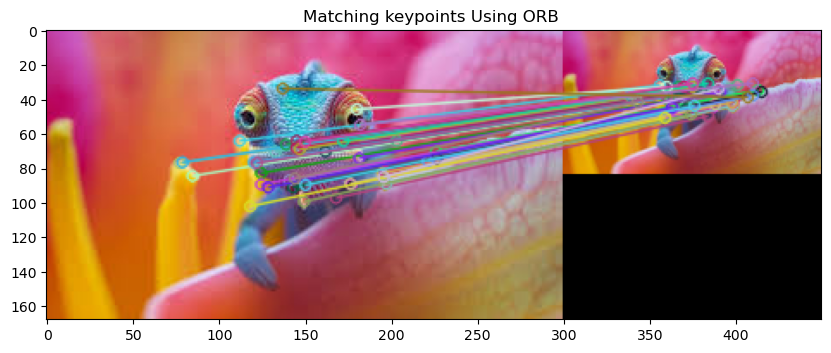

In [59]:

#plot the Image
img_rgb=cv2.cvtColor(matched_image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.title("Matching keypoints Using ORB ")
plt.show()